In [2]:
# !git --version

In [37]:
# !pip install python-git
# !pip install git+https://github.com/joshcarty/google-searchconsole
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install SearchConsole


In [1]:
%%capture
#load libraries needed

from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as ticker
import datetime

In [2]:
import searchconsole

In [3]:
try:
    account = searchconsole.authenticate(client_config='client_secret.json',serialize='client_secret.json', flow='console')
except:
    account = searchconsole.authenticate(client_config='client_secrets.json',
                                     credentials='client_secret.json')

#### Madrid

In [77]:
country_filter = "ESP"
url = "https://madridsecreto.co/" 
search_type = "web" # Disponibles: web, news, video, image, discover & googleNews
start_date = "2022-01-01"  # Formato euskera: '2020-09-09'
end_date = "2022-12-31"

In [78]:
dimension_1 = "query"  # Coger keywords de Search Console
dimension_2 = "page"  # Coger URL de Search Console
dimension_3 = "device"  # Coger dispositivo de Search Console
dimension_4 = "date"  # Coger fecha de Search Console

try:
    print("Reading client_secrets.json & credentials.json..")  # Autenticarse a GSC
    account = searchconsole.authenticate(
        client_config = 'client_secret.json',
        credentials = 'client_secret.json',
    )
    webproperty = account[(url)]  # Conectarse a propiedad GSC
    print("Pulling GSC Data. Please Be Patient!")
    gsc_data = (
        webproperty.query.search_type(search_type).range(start_date, end_date)
            .dimension(
            # dimension_1,
            # dimension_2,
            # dimension_3,
            dimension_4,
        
        )
            .get()
    )
except AttributeError:
    print("No Data Received from Search Console API!")
    sys.exit(1)
print("\nGSC Data Pull Complete!")

Reading client_secrets.json & credentials.json..
Pulling GSC Data. Please Be Patient!

GSC Data Pull Complete!


In [81]:
df_mad = pd.DataFrame(gsc_data)
df_mad = df_mad.sort_values(by="clicks", ascending=False)
print(df_mad.head(10))

           date  clicks  impressions       ctr   position
337  2022-12-04   23870       464421  0.051397  12.197050
336  2022-12-03   23201       473613  0.048987  12.195394
341  2022-12-08   23189       498156  0.046550  14.730309
350  2022-12-17   22558       461461  0.048884  12.132865
343  2022-12-10   22127       429428  0.051527  12.632148
339  2022-12-06   21951       477401  0.045980  12.010266
359  2022-12-26   21863       472349  0.046286  13.616963
301  2022-10-29   21669       445756  0.048612  13.164451
338  2022-12-05   21641       452888  0.047784  12.443624
342  2022-12-09   21445       420415  0.051009  13.714732


#### Barcelona

In [9]:
country_filter = "ESP"
url = "https://barcelonasecreta.com/" 
search_type = "web" 
start_date = "2022-01-01"  
end_date = "2022-12-31"

dimension_1 = "query"  # Coger keywords de Search Console
dimension_2 = "page"  # Coger URL de Search Console
dimension_3 = "device"  # Coger dispositivo de Search Console
dimension_4 = "date"  # Coger fecha de Search Console

try:
    print("Reading client_secrets.json & credentials.json..")  
    account = searchconsole.authenticate(
        client_config = 'client_secret.json',
        credentials = 'client_secret.json',
    )
    webproperty = account[(url)]  
    print("Pulling GSC Data. Please Be Patient!")
    gsc_data = (
        webproperty.query.search_type(search_type).range(start_date, end_date)
            .dimension(
            # dimension_1,
            # dimension_2,
            # dimension_3,
            dimension_4
        )
            .get()
    )
except AttributeError:
    print("No Data Received from Search Console API!")
    sys.exit(1)
print("\nGSC Data Pull Complete!")

Reading client_secrets.json & credentials.json..
Pulling GSC Data. Please Be Patient!

GSC Data Pull Complete!


In [10]:
df_bcn = pd.DataFrame(gsc_data)
df_bcn = df_bcn.sort_values(by="clicks", ascending=False)
print(df_bcn.head(10))

                                                page  clicks  impressions  \
0                      https://barcelonasecreta.com/   51865       208689   
1  https://barcelonasecreta.com/diccionario-del-i...   46097       339043   
2  https://barcelonasecreta.com/50-planes-gratis-...   37835       602938   
3  https://barcelonasecreta.com/buffets-libres-de...   34192       601623   
4  https://barcelonasecreta.com/the-lab-stranger-...   30805       161188   
5  https://barcelonasecreta.com/sitios-secretos-b...   26671       214379   
6  https://barcelonasecreta.com/seis-cafeterias-i...   23008       200562   
7  https://barcelonasecreta.com/no-te-lo-pierdas-...   20148       319477   
8  https://barcelonasecreta.com/halloween-te-espe...   20144       150043   
9  https://barcelonasecreta.com/7-lugares-donde-m...   18450       156368   

        ctr   position  
0  0.248528  29.712673  
1  0.135962  14.236224  
2  0.062751  11.493109  
3  0.056833   9.465124  
4  0.191112   5.456368  
5 

#### Valencia

In [11]:
country_filter = "ESP"
url = "https://valenciasecreta.com/" # Must match the url displayed in SC exactly. If you're having issues, it's usually missing a training slash!
search_type = "web" # available options are: web, news, video, image, discover & googleNews
start_date = "2022-01-01"  # Example formatting: '2020-09-20'
end_date = "2022-12-31"

dimension_1 = "query"  # get keyword data from Search Console
dimension_2 = "page"  # get URL data from Search Console
dimension_3 = "country"  # get country data from Search Console
dimension_4 = "device"  # Get device data from Search Console

try:
    print("Reading client_secrets.json & credentials.json..")  # Authenticate with GSC
    account = searchconsole.authenticate(
        client_config = 'client_secret.json',
        credentials = 'client_secret.json',
    )
    webproperty = account[(url)]  # Connect to the GSC property
    print("Pulling GSC Data. Please Be Patient!")
    gsc_data = (
        webproperty.query.search_type(search_type).range(start_date, end_date)
            .dimension(
            # dimension_1,
            dimension_2,
            # dimension_3,
            # dimension_4,  # Dimensions can be commented out, like this one.
        )
            .get()
    )
except AttributeError:
    print("No Data Received from Search Console API!")
    sys.exit(1)
print("\nGSC Data Pull Complete!")

Reading client_secrets.json & credentials.json..
Pulling GSC Data. Please Be Patient!

GSC Data Pull Complete!


In [12]:
df_vlc = pd.DataFrame(gsc_data)
# df_gsc = df_gsc[df_gsc["country"].str.contains(country_filter)]  # comment this line for worldwide data
df_vlc = df_vlc.sort_values(by="clicks", ascending=False)
print(df_vlc.head(10))

                                                page  clicks  impressions  \
0  https://valenciasecreta.com/que-hacer-valencia...  237791      1349411   
1  https://valenciasecreta.com/restaurantes-bonit...   99200      1031598   
2  https://valenciasecreta.com/restaurantes-valen...   86402      2038831   
3                       https://valenciasecreta.com/   56567       128921   
4  https://valenciasecreta.com/bares-donde-almorz...   41702       595854   
5  https://valenciasecreta.com/restaurantes-paell...   39521       739786   
6  https://valenciasecreta.com/calas-comunitat-va...   30443       216481   
7  https://valenciasecreta.com/solicitar-abono-gr...   26724       361895   
8  https://valenciasecreta.com/begin-restaurante-...   26328       688422   
9  https://valenciasecreta.com/mejores-hamburgues...   25719       332234   

        ctr   position  
0  0.176218  11.977890  
1  0.096161   7.730564  
2  0.042378   9.298977  
3  0.438773  15.424151  
4  0.069987  12.195818  
5 

#### Bilbao

In [13]:
country_filter = "ESP"
url = "https://bilbaosecreto.com/" # Must match the url displayed in SC exactly. If you're having issues, it's usually missing a training slash!
search_type = "web" # available options are: web, news, video, image, discover & googleNews
start_date = "2022-01-01"  # Example formatting: '2020-09-20'
end_date = "2022-12-31"

dimension_1 = "query"  # get keyword data from Search Console
dimension_2 = "page"  # get URL data from Search Console
dimension_3 = "country"  # get country data from Search Console
dimension_4 = "device"  # Get device data from Search Console

try:
    print("Reading client_secrets.json & credentials.json..")  # Authenticate with GSC
    account = searchconsole.authenticate(
        client_config = 'client_secret.json',
        credentials = 'client_secret.json',
    )
    webproperty = account[(url)]  # Connect to the GSC property
    print("Pulling GSC Data. Please Be Patient!")
    gsc_data = (
        webproperty.query.search_type(search_type).range(start_date, end_date)
            .dimension(
            # dimension_1,
            dimension_2,
            # dimension_3,
            # dimension_4,  # Dimensions can be commented out, like this one.
        )
            .get()
    )
except AttributeError:
    print("No Data Received from Search Console API!")
    sys.exit(1)
print("\nGSC Data Pull Complete!")

Reading client_secrets.json & credentials.json..
Pulling GSC Data. Please Be Patient!

GSC Data Pull Complete!


In [14]:
df_bio = pd.DataFrame(gsc_data)
# df_gsc = df_gsc[df_gsc["country"].str.contains(country_filter)]  # comment this line for worldwide data
df_bio = df_bio.sort_values(by="clicks", ascending=False)
print(df_bio.head(10))

                                                page  clicks  impressions  \
0  https://bilbaosecreto.com/planes-fin-de-semana...   29460       241582   
1  https://bilbaosecreto.com/insultos-euskera-que...   13096       115914   
2  https://bilbaosecreto.com/gau-beltza-el-origen...    9032        74305   
3  https://bilbaosecreto.com/pozas-espectaculares...    8709        55913   
4  https://bilbaosecreto.com/terrazas-espectacula...    8673        80393   
5     https://bilbaosecreto.com/menu-del-dia-bilbao/    8513       166273   
6  https://bilbaosecreto.com/luces-navidad-bilbao...    7190        59915   
7  https://bilbaosecreto.com/planes-halloween-bil...    7020        37744   
8  https://bilbaosecreto.com/primer-lefties-bilba...    6862        41246   
9                         https://bilbaosecreto.com/    6685        13641   

        ctr   position  
0  0.121946   9.742551  
1  0.112980  13.536424  
2  0.121553   7.477330  
3  0.155760   7.997496  
4  0.107883  14.212879  
5 

#### Sevilla

In [15]:
country_filter = "ESP"
url = "https://sevillasecreta.co/" # Must match the url displayed in SC exactly. If you're having issues, it's usually missing a training slash!
search_type = "web" # available options are: web, news, video, image, discover & googleNews
start_date = "2022-01-01"  # Example formatting: '2020-09-20'
end_date = "2022-12-31"

dimension_1 = "query"  # get keyword data from Search Console
dimension_2 = "page"  # get URL data from Search Console
dimension_3 = "country"  # get country data from Search Console
dimension_4 = "device"  # Get device data from Search Console

try:
    print("Reading client_secrets.json & credentials.json..")  # Authenticate with GSC
    account = searchconsole.authenticate(
        client_config = 'client_secret.json',
        credentials = 'client_secret.json',
    )
    webproperty = account[(url)]  # Connect to the GSC property
    print("Pulling GSC Data. Please Be Patient!")
    gsc_data = (
        webproperty.query.search_type(search_type).range(start_date, end_date)
            .dimension(
            # dimension_1,
            dimension_2,
            # dimension_3,
            # dimension_4,  # Dimensions can be commented out, like this one.
        )
            .get()
    )
except AttributeError:
    print("No Data Received from Search Console API!")
    sys.exit(1)
print("\nGSC Data Pull Complete!")

Reading client_secrets.json & credentials.json..
Pulling GSC Data. Please Be Patient!

GSC Data Pull Complete!


In [16]:
df_sev = pd.DataFrame(gsc_data)
# df_gsc = df_gsc[df_gsc["country"].str.contains(country_filter)]  # comment this line for worldwide data
df_sev = df_sev.sort_values(by="clicks", ascending=False)
print(df_sev.head(10))

                                                page  clicks  impressions  \
0  https://sevillasecreta.co/50-restaurantes-y-ba...   45277      1197222   
1    https://sevillasecreta.co/planes-fin-de-semana/   43486       575964   
2                         https://sevillasecreta.co/   23924        61016   
3  https://sevillasecreta.co/que-ver-triana-sevilla/   22540       206152   
4  https://sevillasecreta.co/restaurantes-con-enc...   18013       529071   
5  https://sevillasecreta.co/mejores-hamburguesas...   16572       200534   
6  https://sevillasecreta.co/parguela-la-palabra-...   16408       154073   
7   https://sevillasecreta.co/planes-gratis-sevilla/   14447       150656   
8    https://sevillasecreta.co/comer-barato-sevilla/   13878       163882   
9         https://sevillasecreta.co/navidad-sevilla/   10918        90385   

        ctr   position  
0  0.037818  11.227060  
1  0.075501  11.811587  
2  0.392094   9.087846  
3  0.109337   8.027092  
4  0.034046   8.403292  
5 

#### Malaga

In [17]:
country_filter = "ESP"
url = "https://malagasecreta.com/" # Must match the url displayed in SC exactly. If you're having issues, it's usually missing a training slash!
search_type = "web" # available options are: web, news, video, image, discover & googleNews
start_date = "2022-01-01"  # Example formatting: '2020-09-20'
end_date = "2022-12-31"

dimension_1 = "query"  # get keyword data from Search Console
dimension_2 = "page"  # get URL data from Search Console
dimension_3 = "country"  # get country data from Search Console
dimension_4 = "device"  # Get device data from Search Console

try:
    print("Reading client_secrets.json & credentials.json..")  # Authenticate with GSC
    account = searchconsole.authenticate(
        client_config = 'client_secret.json',
        credentials = 'client_secret.json',
    )
    webproperty = account[(url)]  # Connect to the GSC property
    print("Pulling GSC Data. Please Be Patient!")
    gsc_data = (
        webproperty.query.search_type(search_type).range(start_date, end_date)
            .dimension(
            # dimension_1,
            dimension_2,
            # dimension_3,
            # dimension_4,  # Dimensions can be commented out, like this one.
        )
            .get()
    )
except AttributeError:
    print("No Data Received from Search Console API!")
    sys.exit(1)
print("\nGSC Data Pull Complete!")

Reading client_secrets.json & credentials.json..
Pulling GSC Data. Please Be Patient!

GSC Data Pull Complete!


In [18]:
df_mga = pd.DataFrame(gsc_data)
# df_gsc = df_gsc[df_gsc["country"].str.contains(country_filter)]  # comment this line for worldwide data
df_mga = df_mga.sort_values(by="clicks", ascending=False)
print(df_mga.head(10))

                                                page  clicks  impressions  \
0             https://malagasecreta.com/la-polleria/    4143       135303   
1  https://malagasecreta.com/mercadillos-navidad-...    3227        24244   
2  https://malagasecreta.com/mejores-librerias-ma...    2432        42330   
3      https://malagasecreta.com/cascadas-andalucia/    2316        22640   
4  https://malagasecreta.com/pistas-de-hielo-en-m...    1920        19279   
5  https://malagasecreta.com/pueblos-visitar-navi...    1844         8278   
6                         https://malagasecreta.com/    1807         6123   
7             https://malagasecreta.com/candlelight/    1447        44204   
8  https://malagasecreta.com/coches-circular-mala...    1000         3677   
9  https://malagasecreta.com/candlelight-tributo-...     842        19950   

        ctr   position  
0  0.030620  12.213676  
1  0.133105   6.881579  
2  0.057453   8.151169  
3  0.102297  18.092049  
4  0.099590   7.099590  
5 

#### España

In [ ]:
tot = [df_mad, df_bcn, df_sev, df_bio, df_vlc, df_mga]
df_esp = pd.concat(tot)
df_esp.sort_values(by='clicks', ascending=False).head(10)

### EDA

In [19]:
# tot = [df_mad, df_bcn, df_sev, df_bio, df_vlc, df_mga]
# df_esp = pd.concat(tot)
# df_esp.sort_values(by='clicks', ascending=False).head(10)

,page,clicks,impressions,ctr,position
0,https://valenciasecreta.com/que-hacer-valencia...,237791,1349411,0.176218,11.977890
0,https://madridsecreto.co/exposiciones-madrid/,190010,1271907,0.149390,12.538933
1,https://madridsecreto.co/50-cosas-que-hacer-en...,128115,1293336,0.099058,8.464247
2,https://madridsecreto.co/mejores-brunch-madrid/,108284,905979,0.119522,8.358995
3,https://madridsecreto.co/planes-fin-de-semana/,99408,1187267,0.083728,12.449743
1,https://valenciasecreta.com/restaurantes-bonit...,99200,1031598,0.096161,7.730564
4,https://madridsecreto.co/terrazas-madrid/,98911,1374608,0.071956,10.056142
5,https://madridsecreto.co/,95137,288827,0.329391,18.709937
6,https://madridsecreto.co/restaurantes-madrid/,87633,3422771,0.025603,13.387897
2,https://valenciasecreta.com/restaurantes-valen...,86402,2038831,0.042378,9.298977


In [7]:
df_mad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 337 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         365 non-null    object 
 1   clicks       365 non-null    int64  
 2   impressions  365 non-null    int64  
 3   ctr          365 non-null    float64
 4   position     365 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 17.1+ KB


In [9]:
# df_esp=df_esp[df_esp['page']!='https://madridsecreto.co/']
# df_esp=df_esp[df_esp['page']!='https://barcelonasecreta.com/']
# df_esp=df_esp[df_esp['page']!='https://valenciasecreta.com/']
# df_esp=df_esp[df_esp['page']!='https://bilbaosecreto.com/']
# df_esp=df_esp[df_esp['page']!='https://sevillasecreta.co/']
# df_esp=df_esp[df_esp['page']!='https://malagasecreta.com/']
# df_esp.info()

In [22]:
df_esp2=df_esp[df_esp['clicks'] > 10000]
df_esp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   page         137 non-null    object 
 1   clicks       137 non-null    int64  
 2   impressions  137 non-null    int64  
 3   ctr          137 non-null    float64
 4   position     137 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 6.4+ KB


In [23]:
df_esp2.to_csv('Esp_plus_10000.csv', index=False)

In [24]:
df_esp2.sort_values(by='clicks', ascending=False).head(10)

,page,clicks,impressions,ctr,position
0,https://valenciasecreta.com/que-hacer-valencia...,237791,1349411,0.176218,11.977890
0,https://madridsecreto.co/exposiciones-madrid/,190010,1271907,0.149390,12.538933
1,https://madridsecreto.co/50-cosas-que-hacer-en...,128115,1293336,0.099058,8.464247
2,https://madridsecreto.co/mejores-brunch-madrid/,108284,905979,0.119522,8.358995
3,https://madridsecreto.co/planes-fin-de-semana/,99408,1187267,0.083728,12.449743
1,https://valenciasecreta.com/restaurantes-bonit...,99200,1031598,0.096161,7.730564
4,https://madridsecreto.co/terrazas-madrid/,98911,1374608,0.071956,10.056142
6,https://madridsecreto.co/restaurantes-madrid/,87633,3422771,0.025603,13.387897
2,https://valenciasecreta.com/restaurantes-valen...,86402,2038831,0.042378,9.298977
7,https://madridsecreto.co/mejores-cocidos-madrid/,80553,498916,0.161456,10.393453


In [25]:
df_esp2.nunique()

page           137
clicks         136
impressions    137
ctr            137
position       137
dtype: int64

In [26]:
df_sf = pd.read_csv('esp_plus10000_sf.csv')
df_sf.head()

,Dirección,Longitud del título 1,Longitud de la meta description 1,Longitud de H1-1,Longitud de H2-1,Longitud de H2-2,Recuento de palabras,Proporción de texto,Enlaces internos,Enlaces internos únicos,URL de redirección
0,https://madridsecreto.co/bunker-parque-capricho/,67,111,50,42,28,685,"3,470",1,1,NaN
1,https://madridsecreto.co/cines-verano-madrid/,62,139,62,23,37,1322,"4,706",6,4,NaN
2,https://barcelonasecreta.com/7-lugares-donde-m...,76,152,56,0,0,589,"2,807",0,0,NaN
3,https://madridsecreto.co/planes-ninos-madrid/,63,137,63,21,16,1281,"4,634",1,1,NaN
4,https://madridsecreto.co/exposiciones-gratis-m...,58,127,66,45,50,1727,"6,585",12,3,NaN


In [27]:
df_sf.drop(columns=['Proporción de texto', 'URL de redirección'])

,Dirección,Longitud del título 1,Longitud de la meta description 1,Longitud de H1-1,Longitud de H2-1,Longitud de H2-2,Recuento de palabras,Enlaces internos,Enlaces internos únicos
0,https://madridsecreto.co/bunker-parque-capricho/,67,111,50,42,28,685,1,1
1,https://madridsecreto.co/cines-verano-madrid/,62,139,62,23,37,1322,6,4
2,https://barcelonasecreta.com/7-lugares-donde-m...,76,152,56,0,0,589,0,0
3,https://madridsecreto.co/planes-ninos-madrid/,63,137,63,21,16,1281,1,1
4,https://madridsecreto.co/exposiciones-gratis-m...,58,127,66,45,50,1727,12,3
...,...,...,...,...,...,...,...,...,...
132,https://madridsecreto.co/escapadas-cerca-de-ma...,74,141,57,15,21,744,4,4
133,https://madridsecreto.co/los-mejores-y-autenti...,61,141,44,7,15,1349,2,1
134,https://valenciasecreta.com/7-increibles-buffe...,52,141,52,5,15,691,7,1
135,https://valenciasecreta.com/mercados-navidad-v...,62,154,43,43,17,614,6,1


In [28]:
df_sf.rename(columns={'Dirección': 'page', 'Longitud del título 1': 'SEO_Title_len', 'Longitud de la meta description 1': 'meta_desc','Longitud de H1-1':'H1_len', 'Longitud de H2-1': 'H2_len','Longitud de H2-2': 'H2_2_len', 'Recuento de palabras': 'extension'}, inplace=True)
df_sf.head()

,page,SEO_Title_len,meta_desc,H1_len,H2_len,H2_2_len,extension,Proporción de texto,Enlaces internos,Enlaces internos únicos,URL de redirección
0,https://madridsecreto.co/bunker-parque-capricho/,67,111,50,42,28,685,"3,470",1,1,NaN
1,https://madridsecreto.co/cines-verano-madrid/,62,139,62,23,37,1322,"4,706",6,4,NaN
2,https://barcelonasecreta.com/7-lugares-donde-m...,76,152,56,0,0,589,"2,807",0,0,NaN
3,https://madridsecreto.co/planes-ninos-madrid/,63,137,63,21,16,1281,"4,634",1,1,NaN
4,https://madridsecreto.co/exposiciones-gratis-m...,58,127,66,45,50,1727,"6,585",12,3,NaN


In [29]:
import re
bad_urls = []

# Iterar sobre las filas del dataframe
for i, row in df_sf.iterrows():
    # Verificar si la celda contiene alguno de los caracteres deseados
    if any(char in row['page'] for char in ['¿', '?', '¡', '!']):
        # Si cumple, agregar la fila a la lista de resultados
        bad_urls.append(row['page'])

# print(bad_urls)
bad_url=pd.DataFrame(bad_urls, columns=['Bad URLs'])
bad_url.head()

,Bad URLs


In [30]:
bad_url.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Bad URLs  0 non-null      object
dtypes: object(1)
memory usage: 0.0+ bytes


In [31]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   page                     137 non-null    object
 1   SEO_Title_len            137 non-null    int64 
 2   meta_desc                137 non-null    int64 
 3   H1_len                   137 non-null    int64 
 4   H2_len                   137 non-null    int64 
 5   H2_2_len                 137 non-null    int64 
 6   extension                137 non-null    int64 
 7   Proporción de texto      137 non-null    object
 8   Enlaces internos         137 non-null    int64 
 9   Enlaces internos únicos  137 non-null    int64 
 10  URL de redirección       4 non-null      object
dtypes: int64(8), object(3)
memory usage: 11.9+ KB


In [32]:
full_df=pd.merge(df_esp2, df_sf, on='page', how='left')
full_df.sort_values(by='clicks', ascending=False).head()

,page,clicks,impressions,ctr,position,SEO_Title_len,meta_desc,H1_len,H2_len,H2_2_len,extension,Proporción de texto,Enlaces internos,Enlaces internos únicos,URL de redirección
113,https://valenciasecreta.com/que-hacer-valencia...,237791,1349411,0.176218,11.977890,54,116,54,27,27,1291,"5,965",16,2,NaN
0,https://madridsecreto.co/exposiciones-madrid/,190010,1271907,0.149390,12.538933,52,138,60,24,16,3772,"11,203",2,2,NaN
1,https://madridsecreto.co/50-cosas-que-hacer-en...,128115,1293336,0.099058,8.464247,56,132,56,31,24,2236,"7,520",4,3,NaN
2,https://madridsecreto.co/mejores-brunch-madrid/,108284,905979,0.119522,8.358995,48,138,31,19,10,2176,"6,345",4,3,NaN
3,https://madridsecreto.co/planes-fin-de-semana/,99408,1187267,0.083728,12.449743,58,133,52,15,3,4192,"10,863",34,1,NaN


In [33]:
full_df.tail()

,page,clicks,impressions,ctr,position,SEO_Title_len,meta_desc,H1_len,H2_len,H2_2_len,extension,Proporción de texto,Enlaces internos,Enlaces internos únicos,URL de redirección
132,https://valenciasecreta.com/menu-del-dia-valen...,12058,109047,0.110576,11.255816,71,146,52,22,13,843,"4,361",8,1,NaN
133,https://valenciasecreta.com/atardecer-en-valen...,11692,118151,0.098958,7.832443,72,148,53,22,0,226,"1,830",0,0,NaN
134,https://valenciasecreta.com/portal-de-stranger...,11287,103313,0.109251,6.223931,82,152,63,0,0,318,"2,414",0,0,NaN
135,https://valenciasecreta.com/escapadas-fin-de-s...,11067,129442,0.085498,15.266475,75,153,56,5,9,869,"4,385",10,1,NaN
136,https://valenciasecreta.com/donde-tomar-horcha...,10655,171412,0.062160,9.375458,50,147,50,16,7,936,"4,796",11,1,NaN


In [34]:
full_df.describe()

,clicks,impressions,ctr,position,SEO_Title_len,meta_desc,H1_len,H2_len,H2_2_len,extension,Enlaces internos,Enlaces internos únicos
count,137.000000,1.370000e+02,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,27739.328467,4.040571e+05,0.084666,10.211667,62.467153,130.810219,53.905109,20.613139,17.664234,1298.861314,3.007299,1.014599
std,31280.036858,4.210626e+05,0.047549,2.851547,17.113828,26.514018,14.985720,17.118208,17.131532,862.207701,5.919182,1.271783
min,10262.000000,4.526200e+04,0.013654,4.360314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12734.000000,1.611880e+05,0.048166,8.270128,55.000000,124.000000,46.000000,8.000000,5.000000,691.000000,0.000000,0.000000
50%,18013.000000,2.433320e+05,0.076486,10.056142,62.000000,135.000000,54.000000,16.000000,15.000000,1104.000000,1.000000,1.000000
75%,27730.000000,4.989160e+05,0.112980,12.103987,72.000000,146.000000,63.000000,30.000000,24.000000,1627.000000,3.000000,2.000000
max,237791.000000,3.422771e+06,0.289050,21.617209,103.000000,156.000000,89.000000,81.000000,85.000000,4599.000000,34.000000,7.000000


In [35]:
full_df.sort_values(by='ctr', ascending=False).head()

,page,clicks,impressions,ctr,position,SEO_Title_len,meta_desc,H1_len,H2_len,H2_2_len,extension,Proporción de texto,Enlaces internos,Enlaces internos únicos,URL de redirección
58,https://madridsecreto.co/exposiciones-gratis-m...,13083,45262,0.289050,13.364633,58,127,66,45,50,1727,"6,585",12,3,NaN
23,https://madridsecreto.co/historia-flechas-gran...,27361,104545,0.261715,10.064432,82,151,65,0,0,577,"2,800",1,1,NaN
17,https://madridsecreto.co/grieta-callao-strange...,29623,142808,0.207432,5.203371,77,147,60,35,0,591,"3,011",0,0,NaN
79,https://barcelonasecreta.com/the-lab-stranger-...,30805,161188,0.191112,5.456368,57,127,56,0,0,316,"1,844",0,0,NaN
113,https://valenciasecreta.com/que-hacer-valencia...,237791,1349411,0.176218,11.977890,54,116,54,27,27,1291,"5,965",16,2,NaN


EDA

In [36]:
import seaborn as sns

<AxesSubplot:>

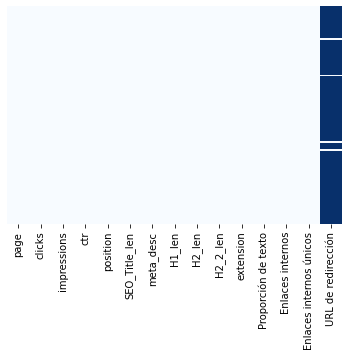

In [37]:
sns.heatmap(full_df.isnull(), yticklabels=False, cbar=False, cmap = 'Blues')

In [38]:
full_df=full_df.drop(['URL de redirección'], axis=1)

array([[<AxesSubplot:title={'center':'clicks'}>,
        <AxesSubplot:title={'center':'impressions'}>,
        <AxesSubplot:title={'center':'ctr'}>],
       [<AxesSubplot:title={'center':'position'}>,
        <AxesSubplot:title={'center':'SEO_Title_len'}>,
        <AxesSubplot:title={'center':'meta_desc'}>],
       [<AxesSubplot:title={'center':'H1_len'}>,
        <AxesSubplot:title={'center':'H2_len'}>,
        <AxesSubplot:title={'center':'H2_2_len'}>],
       [<AxesSubplot:title={'center':'extension'}>,
        <AxesSubplot:title={'center':'Enlaces internos'}>,
        <AxesSubplot:title={'center':'Enlaces internos únicos'}>]],
      dtype=object)

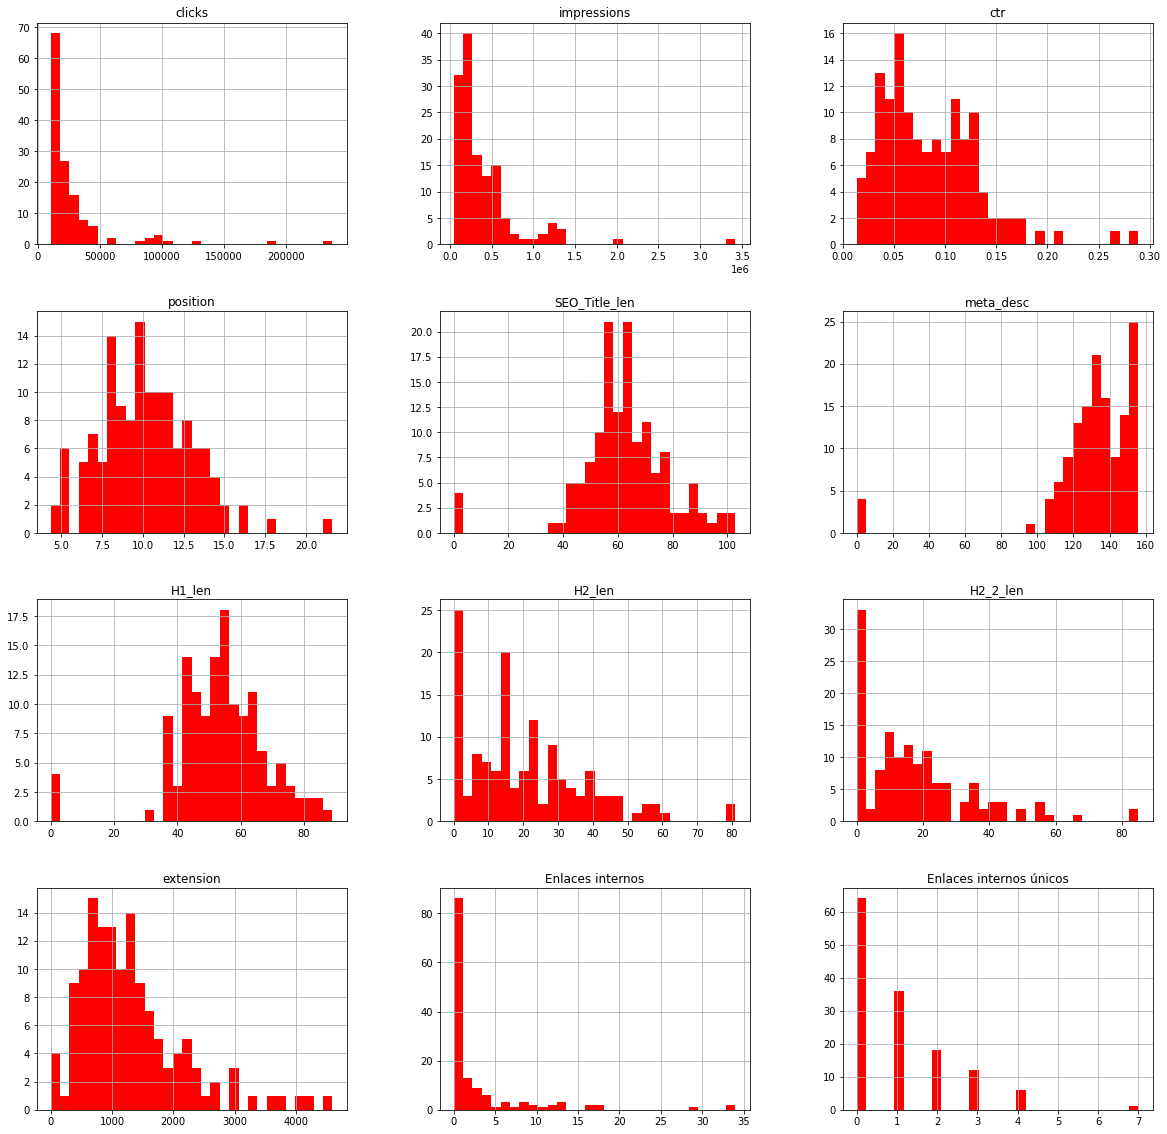

In [39]:
full_df.hist(bins = 30, figsize=(20,20), color = 'r')

In [40]:
# Rellenar los datos faltantes con el promedio del campo

full_df.loc[(full_df['SEO_Title_len'].isnull() == True), 'SEO_Title_len'] = full_df['SEO_Title_len'].mean() # hacemos que los valores NaN de la columna sean = a la media de dicha columna
full_df.loc[(full_df['meta_desc'].isnull() == True), 'meta_desc'] = full_df['meta_desc'].mean()
full_df.loc[(full_df['H1_len'].isnull() == True), 'H1_len'] = full_df['H1_len'].mean()

In [41]:
corr = full_df.corr()

<AxesSubplot:>

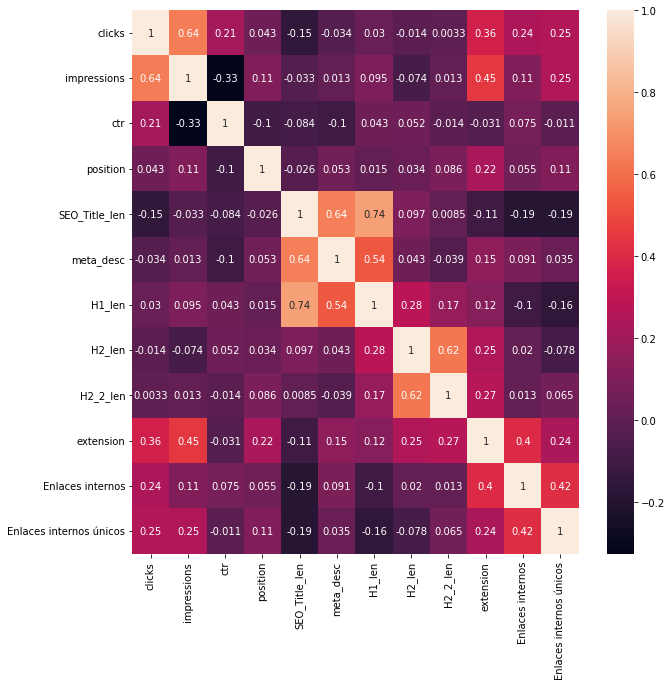

In [42]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot = True)

In [43]:
full_df=full_df.drop(columns='Proporción de texto')

In [44]:
full_df.columns

Index(['page', 'clicks', 'impressions', 'ctr', 'position', 'SEO_Title_len',
       'meta_desc', 'H1_len', 'H2_len', 'H2_2_len', 'extension',
       'Enlaces internos', 'Enlaces internos únicos'],
      dtype='object')

In [45]:
X= full_df.iloc[:,2:]
y=full_df.iloc[:,1]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 43)

In [47]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = regression.predict (X_test)
y_pred

array([46666.1760674 ,  8420.63629051, 19992.39454655, 16923.62147351,
       17319.52738929, 29032.80270289, 38170.54081979, 21642.5468216 ,
       43804.26421362, 24456.71858353,  5606.04285278, 14398.61449569,
       21485.99240125,  4884.07866717, 16346.12344884, 13513.68397053,
       66616.85890028, 14008.86955152, 22396.26193595, 34617.64948102,
       18318.95543776, 37043.55206094, 33580.3380781 , 26238.19456839,
       44066.69019718, 82681.15693925, 33709.18644731, 22957.24513845])

In [50]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test, y_pred))


MAE: 11010.902547625197


In [51]:
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(y_test, y_pred))


MSE: 270308188.61387146


In [52]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 16441.05193148758


### Prophet

In [28]:
df_mad["date"] = pd.to_datetime(df_mad.date)

In [29]:
df_mad.columns

Index(['date', 'clicks', 'impressions', 'ctr', 'position'], dtype='object')

In [33]:
df_mad2=df_mad.drop(columns=['ctr','position'])

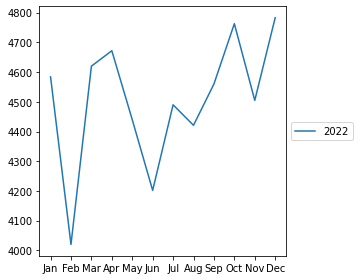

In [13]:
# dummy data (Days)
dates_d = pd.date_range('2022-01-01', '2022-12-31', freq='D')
df_year = pd.DataFrame(np.random.randint(100, 200, (dates_d.shape[0], 1)), columns=['Data'])
df_year.index = dates_d #set index

pt = pd.pivot_table(df_year, index=df_year.index.month, columns=df_year.index.year, aggfunc='sum')
pt.columns = pt.columns.droplevel() # remove the double header (0) as pivot creates a multiindex.

ax = plt.figure().add_subplot(111)
ax.plot(pt)

ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis

ax.legend(pt.columns.tolist(), loc='center left', bbox_to_anchor=(1, .5)) #add the column names as legend.
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [34]:
dft = df_mad2.reset_index().rename(columns={"date":"ds", "clicks":"y"})

In [15]:
m = Prophet()

m.fit(dft)

21:13:37 - cmdstanpy - INFO - Chain [1] start processing
21:13:37 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
#Predicting clicks for the next 30 days.

future_30 = m.make_future_dataframe(periods=30)

forecast_30 = m.predict(future_30)

In [17]:
#Visualizing the prediction for next 30 days.
import prophet.plot
from prophet.plot import plot_plotly
plot_plotly(m, forecast_30, xlabel='Date', ylabel='Clicks')

In [19]:
train = dft.drop(dft.index[-12:])
future = dft.loc[dft["ds"]> train.iloc[len(train)-1]["ds"]]["ds"]

In [25]:
from sklearn.metrics import mean_absolute_error
import numpy as np
from numpy import array

#We train the model
model = Prophet()
model.fit(train)

#Adapt the dataframe that is used for the forecast days to Prophet’s required format.
future = list(future)
future = pd.DataFrame(future)
# future = future.rename(columns={0: 'ds'})

# We make the forecast
forecast = model.predict(future)

# We calculate the MAE between the actual values and the predicted values
y_true = dft['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)

# We plot the final output for a visual understanding
y_true = np.stack(y_true).astype(float)
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()
print(mae)

21:22:52 - cmdstanpy - INFO - Chain [1] start processing
21:22:52 - cmdstanpy - INFO - Chain [1] done processing


KeyError: 'ds'

# Otro intento 

In [ ]:
df_mad()

21:44:50 - cmdstanpy - INFO - Chain [1] start processing
21:44:50 - cmdstanpy - INFO - Chain [1] done processing


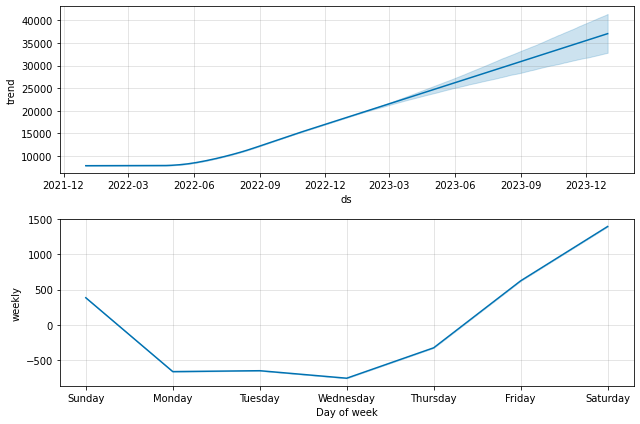

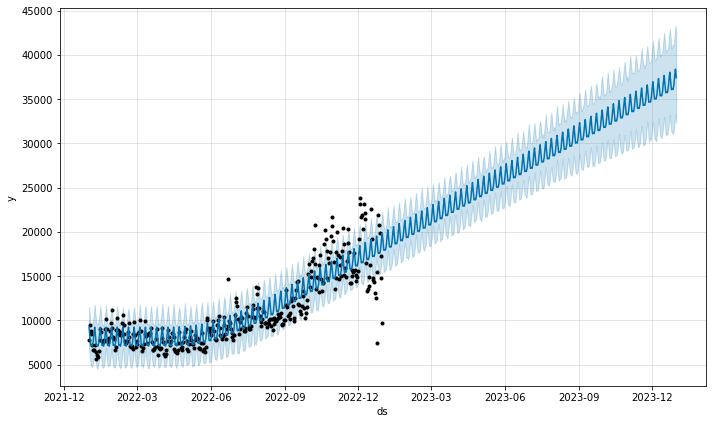

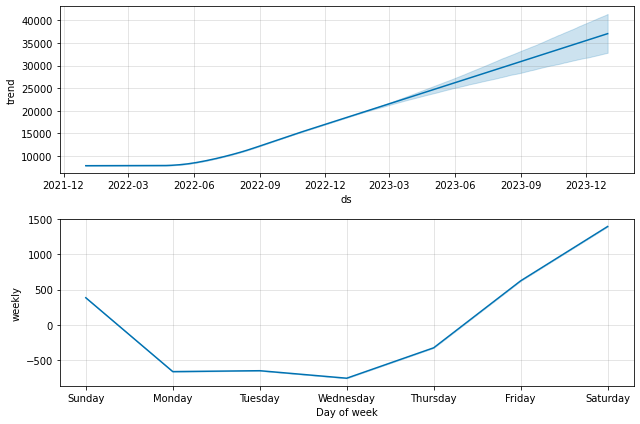

In [35]:
m = Prophet()
m.fit(dft)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)
m.plot_components(forecast)

In [73]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='110 days', period='15 days', horizon = '55 days')


  0%|          | 0/14 [00:00<?, ?it/s]22:00:24 - cmdstanpy - INFO - Chain [1] start processing
22:00:24 - cmdstanpy - INFO - Chain [1] done processing
  7%|▋         | 1/14 [00:00<00:02,  4.78it/s]22:00:25 - cmdstanpy - INFO - Chain [1] start processing
22:00:25 - cmdstanpy - INFO - Chain [1] done processing
 14%|█▍        | 2/14 [00:00<00:02,  4.72it/s]22:00:25 - cmdstanpy - INFO - Chain [1] start processing
22:00:25 - cmdstanpy - INFO - Chain [1] done processing
 21%|██▏       | 3/14 [00:00<00:02,  4.73it/s]22:00:25 - cmdstanpy - INFO - Chain [1] start processing
22:00:25 - cmdstanpy - INFO - Chain [1] done processing
 29%|██▊       | 4/14 [00:00<00:02,  4.78it/s]22:00:25 - cmdstanpy - INFO - Chain [1] start processing
22:00:25 - cmdstanpy - INFO - Chain [1] done processing
 36%|███▌      | 5/14 [00:01<00:01,  4.65it/s]22:00:25 - cmdstanpy - INFO - Chain [1] start processing
22:00:25 - cmdstanpy - INFO - Chain [1] done processing
 43%|████▎     | 6/14 [00:01<00:01,  4.68it/s]22:00:26

In [74]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-04-26,6560.836957,5572.262630,7434.508634,6699,2022-04-25
1,2022-04-27,6434.833101,5484.990413,7416.514241,6966,2022-04-25
2,2022-04-28,6738.496610,5833.085702,7679.749743,7503,2022-04-25
3,2022-04-29,7622.337148,6707.014560,8610.077638,8157,2022-04-25
4,2022-04-30,8568.241747,7598.461281,9524.876970,8657,2022-04-25


In [75]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,2.010513e+06,1417.925476,1084.612623,0.096754,0.076097,0.099096,0.649351
1,7 days,1.946690e+06,1395.238422,1096.030192,0.098435,0.087959,0.101113,0.610390
2,8 days,2.309918e+06,1519.841354,1190.048847,0.102861,0.099518,0.105999,0.558442
3,9 days,2.505733e+06,1582.950624,1253.054292,0.105760,0.094862,0.109226,0.525974
4,10 days,2.493562e+06,1579.101498,1221.187684,0.101563,0.086830,0.105417,0.525974


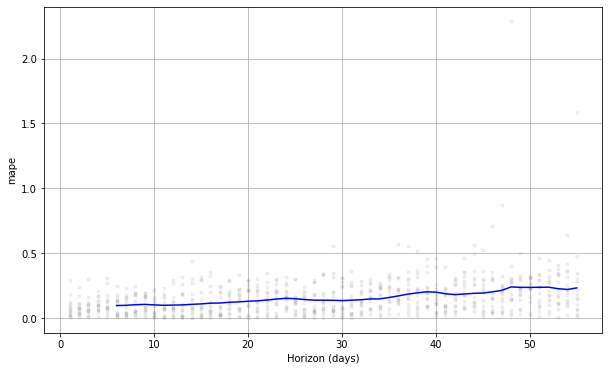

In [76]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
